In [1]:
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

In [2]:
import os
import tensorflow as tf

In [3]:
from sklearn.preprocessing import MinMaxScaler

# Keras Specific Dependencies

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
# Categorize targets, specify categorical values 1-10 to predict
from keras.utils import to_categorical
#Dense layers
from keras.layers import Dense
#MNIST dataset from Keras
from keras.datasets import mnist


# Load and Preprocess Data

In [5]:
# Load the MNIST Handwriting Dataset from Keras
# Split into training and testing in which X is input variable (array of 0 and 1 to say darkness of a pixel) and y train is the label of the number
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
print("Training Data Info")
print("Training Data Shape:", X_train.shape)
print("Training Data Labels Shape:", y_train.shape)

Training Data Info
Training Data Shape: (60000, 28, 28)
Training Data Labels Shape: (60000,)


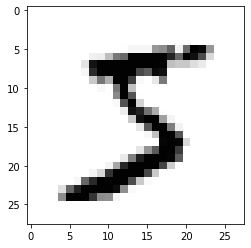

In [7]:
# Plot the first digit
plt.imshow(X_train[0,:,:], cmap=plt.cm.Greys)

In [8]:
y_train[0]

5

In [9]:
# Each image is 28x28 Pixel greyscale image with values from 0 to 255
# Visualize the array of the first number in the training dataset
X_train[0, :, :]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
# For logistic regression, array needs to be flattened into rows of 1D arrays
ndims = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], ndims)
X_test = X_test.reshape(X_test.shape[0], ndims)
print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (60000, 784)
Testing Shape: (10000, 784)


# Scaling and Normalization
Use Sklearn's MinMaxScaler to normalize data between zero and one

In [11]:
scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Or normalize based on max pixel
#X_train = X_train.astype("float32")
#X_test = X_test.astype("float32")

#X_train /= 255.0
#X_test /= 255.0

# One-Hot Encoding
One-hot encoud integer labels using the to_categorical helper function

In [13]:
# Training data are integers encoded 0 to 9
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [15]:
num_class =10
y_train = to_categorical(y_train, num_class)
y_test = to_categorical(y_test, num_class)

In [18]:
# Add first hidden layer
# Specify dimensions of our input layer (in this example its the number of elements (pixels) in each image)
model = Sequential()
model.add(Dense(100, activation = 'relu', input_dim = X_train.shape[1]))

In [19]:
# Final output layers uses a softmax activation function for logistic regression
# Agin specify the number of output classes, here its the number of digits we want to classify
model.add(Dense(num_class, activation='softmax'))

In [23]:
#Compile the model
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Train the model
model.fit(X_train, y_train, epochs=10, shuffle=True, verbose=2)

Epoch 1/10
1875/1875 - 3s - loss: 0.2761 - accuracy: 0.9227
Epoch 2/10
1875/1875 - 2s - loss: 0.1239 - accuracy: 0.9635
Epoch 3/10
1875/1875 - 2s - loss: 0.0862 - accuracy: 0.9737
Epoch 4/10
1875/1875 - 2s - loss: 0.0659 - accuracy: 0.9798
Epoch 5/10
1875/1875 - 2s - loss: 0.0513 - accuracy: 0.9840
Epoch 6/10
1875/1875 - 2s - loss: 0.0413 - accuracy: 0.9873
Epoch 7/10
1875/1875 - 2s - loss: 0.0337 - accuracy: 0.9896
Epoch 8/10
1875/1875 - 2s - loss: 0.0279 - accuracy: 0.9914
Epoch 9/10
1875/1875 - 2s - loss: 0.0242 - accuracy: 0.9922
Epoch 10/10
1875/1875 - 2s - loss: 0.0195 - accuracy: 0.9939


In [26]:
model.save("mnist_trained.h5")

In [27]:
# Load model
from keras.models import load_model
model = load_model("mnist_trained.h5")

In [31]:
#Evaluate the model
# Use testing data to validate the model and determine the ability to predict new and previously unseen data points
model_loss, model_accuracy = model.evaluate(X_test,y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

313/313 - 0s - loss: 0.0812 - accuracy: 0.9788
Loss: 0.08120639622211456, Accuracy: 0.9787999987602234


In [32]:
# Make Predictions
test = np.expand_dims(X_train[0], axis=0)
test.shape

(1, 784)

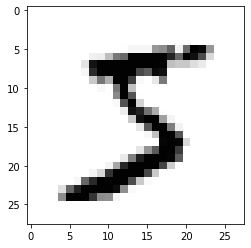

In [33]:
plt.imshow(scaler.inverse_transform(test).reshape(28,28), cmap=plt.cm.Greys)

In [35]:
model.predict(test).round()

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

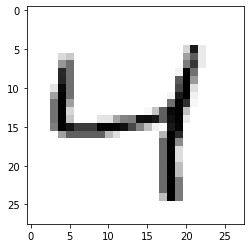

In [37]:
test = np.expand_dims(X_train[2], axis=0)

plt.imshow(scaler.inverse_transform(test).reshape(28,28), cmap=plt.cm.Greys)

In [40]:
print(f"One-Hot-Encoding Prediciton: {model.predict(test).round()}")
print(f"Predicted class: {model.predict_classes(test)}")

One-Hot-Encoding Prediciton: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Predicted class: [4]


In [48]:
# Import a custom image
from keras.preprocessing import image
filepath = "./Images/test_eight.jpg"
image_size = (28,28)
im = image.load_img(filepath, target_size=image_size, grayscale = True)
im


In [50]:
from keras_preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

(28, 28, 1)

In [57]:
image /= 255

#Flatten into a 1x 28 x28 array
img = image.flatten().reshape(-1, 28*28)
img.shape

(1, 784)

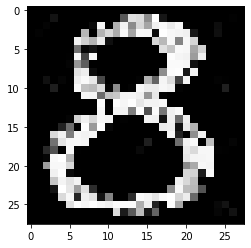

In [58]:
plt.imshow(img.reshape(28,28), cmap=plt.cm.Greys)

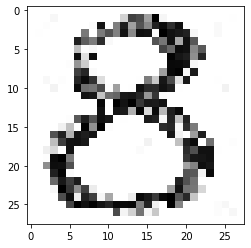

In [59]:
#Invert to match the data
img = 1-img
plt.imshow(img.reshape(28,28), cmap=plt.cm.Greys)

In [62]:
model.predict_classes(img)

array([5])

In [63]:
model.predict(img)

array([[0.0000000e+00, 3.3940784e-19, 3.8864305e-06, 3.7514310e-12,
        0.0000000e+00, 9.9999607e-01, 8.7050086e-22, 4.7300385e-20,
        5.3185892e-21, 0.0000000e+00]], dtype=float32)